#*Data Describtion Before Preprocessing*

In [ ]:
#imports
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
confusion_matrix,
accuracy_score,
precision_score,
recall_score,
f1_score,
roc_curve,
auc,
mean_absolute_error,
mean_squared_error,
r2_score
)


In [ ]:
uploaded = files.upload()
df = pd.read_csv('heart.csv')

Saving heart.csv to heart.csv


In [ ]:
#data description
print("First 5 rows of the dataset ( before preprocessing):")
df.head()


First 5 rows of the dataset ( before preprocessing):


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,NaN,212.0,0,1.0,168,0.0,1.0,2,2,3.0,0
1,53,1,0,140.0,203.0,1,0.0,155,1.0,3.1,0,0,3.0,0
2,70,1,0,145.0,174.0,0,1.0,125,NaN,2.6,0,0,3.0,0
3,61,1,0,148.0,203.0,0,1.0,161,0.0,0.0,2,1,3.0,0
4,62,0,0,138.0,294.0,1,1.0,106,0.0,1.9,1,3,2.0,0


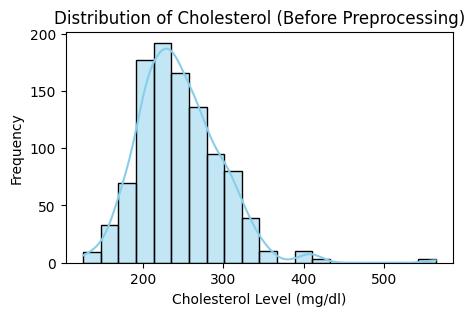

In [ ]:
# Draw histogram for cholesterol
plt.figure(figsize=(5,3))
sns.histplot(df['chol'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Cholesterol (Before Preprocessing)")
plt.xlabel("Cholesterol Level (mg/dl)")
plt.ylabel("Frequency")
plt.show()

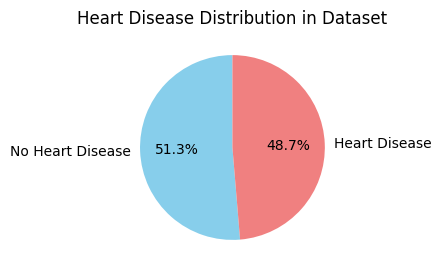

In [ ]:
target_counts = df['target'].value_counts()
labels = ['No Heart Disease', 'Heart Disease']
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(3,3))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Heart Disease Distribution in Dataset')
plt.show()

DataSet before preprocessing

In [ ]:
print("\nDataset info before preprocessing (column names, data types, non-null counts):")
df.info()


Dataset info before preprocessing (column names, data types, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1023 non-null   float64
 4   chol      1023 non-null   float64
 5   fbs       1025 non-null   int64  
 6   restecg   1024 non-null   float64
 7   thalach   1025 non-null   int64  
 8   exang     1023 non-null   float64
 9   oldpeak   1024 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1024 non-null   float64
 13  target    1025 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 112.2 KB


#**Preprocessing**

In [ ]:
#duplicates
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
display(duplicate_rows.head(10))
print("All duplicates are kept because they represent valid patient records.")

Number of duplicate rows: 716


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118.0,210.0,0,1.0,192,0.0,0.7,2,0,2.0,1
31,50,0,1,120.0,244.0,0,1.0,162,0.0,1.1,2,0,2.0,1
43,46,1,0,120.0,249.0,0,0.0,144,0.0,0.8,2,0,3.0,0
55,55,1,0,140.0,217.0,0,1.0,111,1.0,5.6,0,0,3.0,0
61,66,0,2,146.0,278.0,0,0.0,152,0.0,0.0,1,1,2.0,1
64,29,1,1,130.0,204.0,0,0.0,202,0.0,0.0,2,0,2.0,1
79,52,1,1,134.0,201.0,0,1.0,158,0.0,0.8,2,1,2.0,1
82,46,1,2,150.0,231.0,0,1.0,147,0.0,3.6,1,0,2.0,0
83,38,1,2,138.0,175.0,0,1.0,173,0.0,0.0,2,4,2.0,1
84,37,0,2,120.0,215.0,0,1.0,170,0.0,0.0,2,0,2.0,1


All duplicates are kept because they represent valid patient records.


In [ ]:
#missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
age         0
sex         0
cp          0
trestbps    2
chol        2
fbs         0
restecg     1
thalach     0
exang       2
oldpeak     1
slope       0
ca          0
thal        1
target      0
dtype: int64


In [ ]:
# filling missing numerical values with median,usually better for medical data because it’s less sensitive to outliers.
num_cols = ['trestbps', 'chol', 'oldpeak']
for col in num_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

#fill missing categorical values with mode, they're binary
cat_cols = ['restecg', 'exang', 'thal']
for col in cat_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# checking again for missing values
print("Missing values after preprocessing:")
print(df.isnull().sum())

Missing values after preprocessing:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


/tmp/ipython-input-15325605.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
/tmp/ipython-input-15325605.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

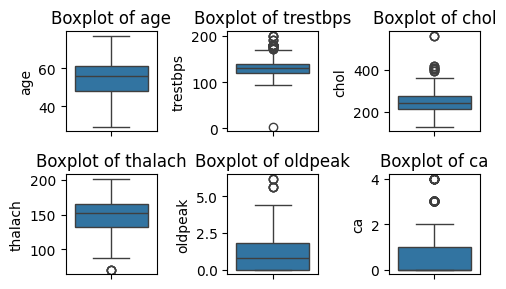


Outliers are visible in several numerical features (e.g., cholesterol, oldpeak, trestbps).
These extreme values are kept, as they may represent patients with high risk indicators of heart disease.


In [ ]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Plot boxplots to detect outliers
plt.figure(figsize=(5, 3))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

print("\nOutliers are visible in several numerical features (e.g., cholesterol, oldpeak, trestbps).")
print("These extreme values are kept, as they may represent patients with high risk indicators of heart disease.")


In [ ]:
#dataset info after preprocessing
print("\nDataset info after preprocessing:")
df.info()
display(df.head())


Dataset info after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   float64
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   float64
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   float64
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   float64
 13  target    1025 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,130.0,212.0,0,1.0,168,0.0,1.0,2,2,3.0,0
1,53,1,0,140.0,203.0,1,0.0,155,1.0,3.1,0,0,3.0,0
2,70,1,0,145.0,174.0,0,1.0,125,0.0,2.6,0,0,3.0,0
3,61,1,0,148.0,203.0,0,1.0,161,0.0,0.0,2,1,3.0,0
4,62,0,0,138.0,294.0,1,1.0,106,0.0,1.9,1,3,2.0,0


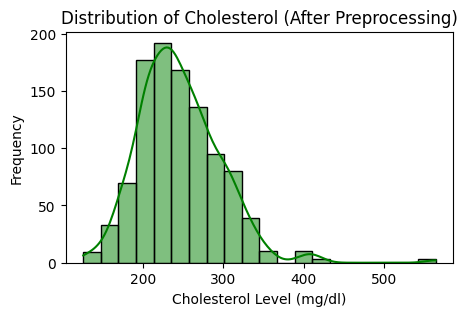

In [ ]:
# Draw histogram for cholesterol
plt.figure(figsize=(5,3))
sns.histplot(df['chol'], bins=20, kde=True, color='green', edgecolor='black')
plt.title("Distribution of Cholesterol (After Preprocessing)")
plt.xlabel("Cholesterol Level (mg/dl)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#encoding to show understanding
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_array = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

numerical_cols = [col for col in df.columns if col not in categorical_cols]
df_onehot = pd.concat([df[numerical_cols].reset_index(drop=True), encoded_df], axis=1)

print("Shape before encoding:", df.shape)
print("Shape after one-hot encoding (drop='first'):", df_onehot.shape)
print("\nNumber of new columns per feature:\n")
for col, cats in zip(categorical_cols, encoder.categories_):
    print(f"{col}: {len(cats)} categories → {len(cats) - 1} new columns created")


Shape before encoding: (1025, 14)
Shape after one-hot encoding (drop='first'): (1025, 20)

Number of new columns per feature:

sex: 2 categories → 1 new columns created
cp: 4 categories → 3 new columns created
fbs: 2 categories → 1 new columns created
restecg: 3 categories → 2 new columns created
exang: 2 categories → 1 new columns created
slope: 3 categories → 2 new columns created
thal: 4 categories → 3 new columns created


In [ ]:
print(" Descriptive Statistics ")
print(df.describe())

 Descriptive Statistics 
               age          sex           cp     trestbps         chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean     54.434146     0.695610     0.942439   131.509268   245.918049   
std       9.072290     0.460373     1.029641    17.964868    51.524940   
min      29.000000     0.000000     0.000000     3.000000   126.000000   
25%      48.000000     0.000000     0.000000   120.000000   211.000000   
50%      56.000000     1.000000     1.000000   130.000000   240.000000   
75%      61.000000     1.000000     2.000000   140.000000   275.000000   
max      77.000000     1.000000     3.000000   200.000000   564.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.334634     1.072293   
std       0.356527     0.527878    23.005724     0.472093     1.174606   
min       0.

In [ ]:
corr_matrix = df.corr()
print("\n Correlation Matrix ")
print(corr_matrix)


 Correlation Matrix 
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.265290  0.218683  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.080778 -0.199571  0.027200   
cp       -0.071966 -0.041119  1.000000  0.042449 -0.079960  0.079294   
trestbps  0.265290 -0.080778  0.042449  1.000000  0.119923  0.179622   
chol      0.218683 -0.199571 -0.079960  0.119923  1.000000  0.023154   
fbs       0.121243  0.027200  0.079294  0.179622  0.023154  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.125791 -0.146006 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.023571 -0.020621 -0.008866   
exang     0.082788  0.136622 -0.398304  0.048629  0.068214  0.045262   
oldpeak   0.207671  0.085159 -0.174117  0.178047  0.063981  0.010585   
slope    -0.169105 -0.026666  0.131633 -0.113440 -0.016035 -0.061902   
ca        0.271551  0.111729 -0.176206  0.094520  0.070667  0.137156   
thal      0.072579  0.197472 -0.161974  0.

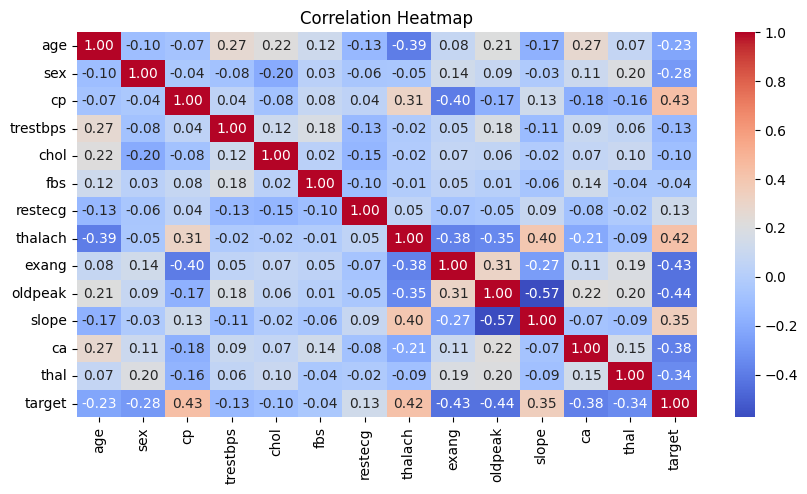

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

sorted_pairs = upper_tri.stack().sort_values(key=lambda x: x.abs(), ascending=False)

top_n = 5
top_pairs = sorted_pairs.head(top_n)

print(f"\nTop {min(top_n, len(sorted_pairs))} Strongest Correlations (by absolute value) ")
print(top_pairs)


Top 5 Strongest Correlations (by absolute value) 
oldpeak  slope    -0.574746
         target   -0.437961
cp       target    0.434854
exang    target   -0.434414
thalach  target    0.422895
dtype: float64


## **Visualization and trends**

In [ ]:
# Summary statistics for numerical columns
print("Descriptive statistics:\n", df.describe())
print("\n")

Descriptive statistics:
                age          sex           cp     trestbps         chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean     54.434146     0.695610     0.942439   131.509268   245.918049   
std       9.072290     0.460373     1.029641    17.964868    51.524940   
min      29.000000     0.000000     0.000000     3.000000   126.000000   
25%      48.000000     0.000000     0.000000   120.000000   211.000000   
50%      56.000000     1.000000     1.000000   130.000000   240.000000   
75%      61.000000     1.000000     2.000000   140.000000   275.000000   
max      77.000000     1.000000     3.000000   200.000000   564.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.334634     1.072293   
std       0.356527     0.527878    23.005724     0.472093     1.174606   
min       0.

In [ ]:
# Check unique values for categorical columns
print("Unique values for categorical-like columns:\n")

for col in df.columns:
    if df[col].nunique() < 10:   # you can change 10 if you want
        print(f"{col}: {df[col].unique()}")


Unique values for categorical-like columns:

sex: [1 0]
cp: [0 1 2 3]
fbs: [0 1]
restecg: [1. 0. 2.]
exang: [0. 1.]
slope: [2 0 1]
ca: [2 0 1 3 4]
thal: [3. 2. 1. 0.]
target: [0 1]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set general visualization style
sns.set(style="whitegrid", palette="muted")

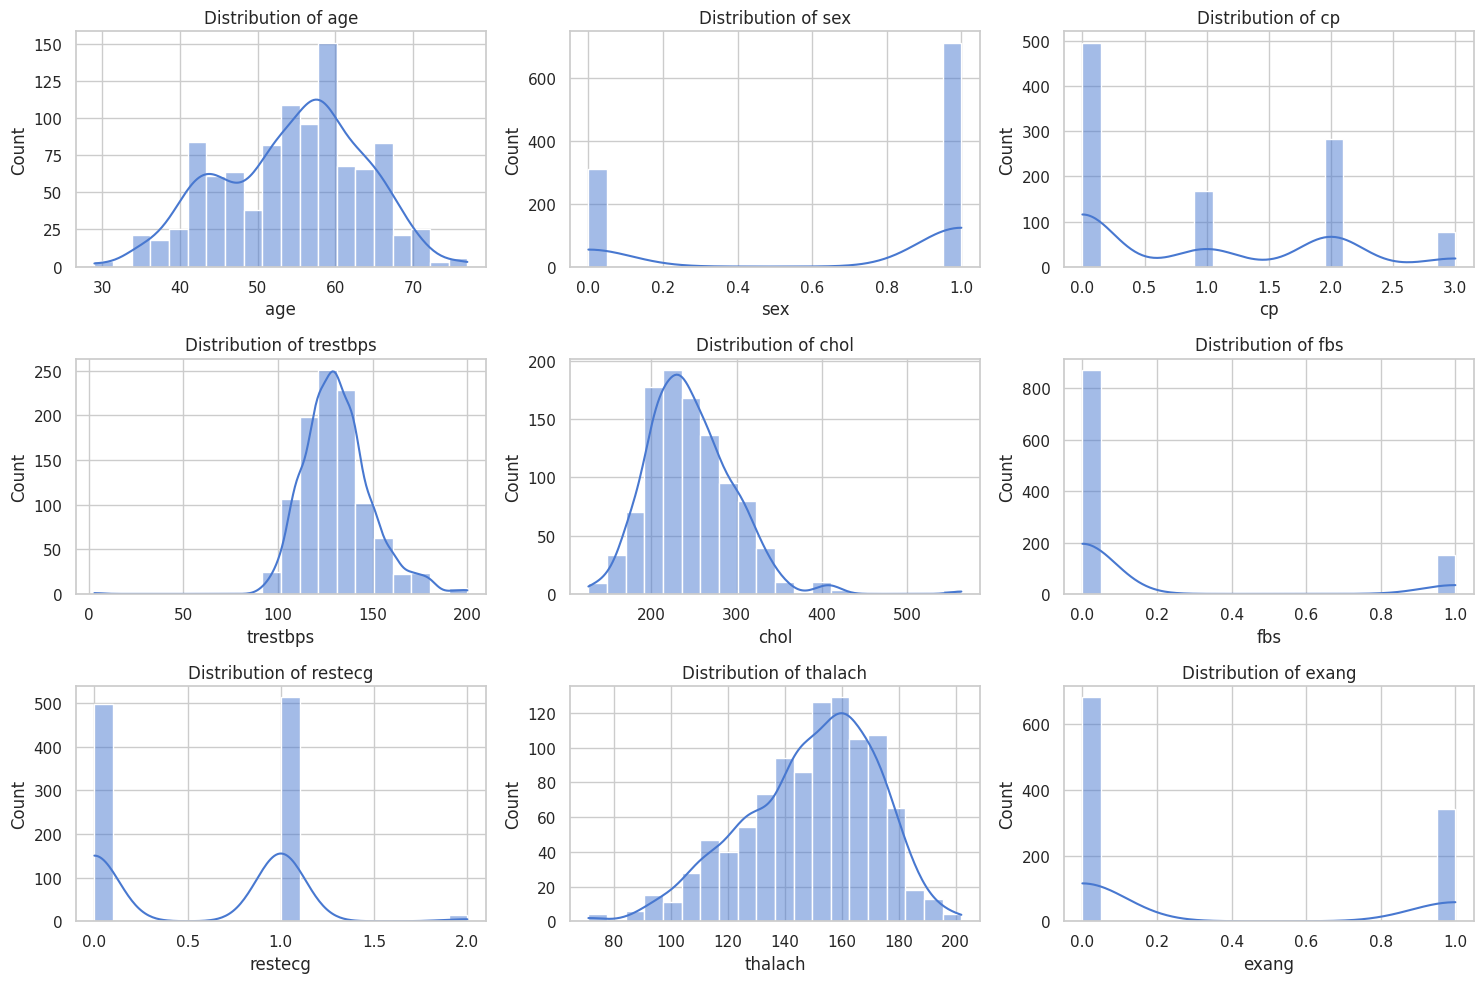

In [ ]:
# DISTRIBUTIONS OF NUMERICAL FEATURES

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:9], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

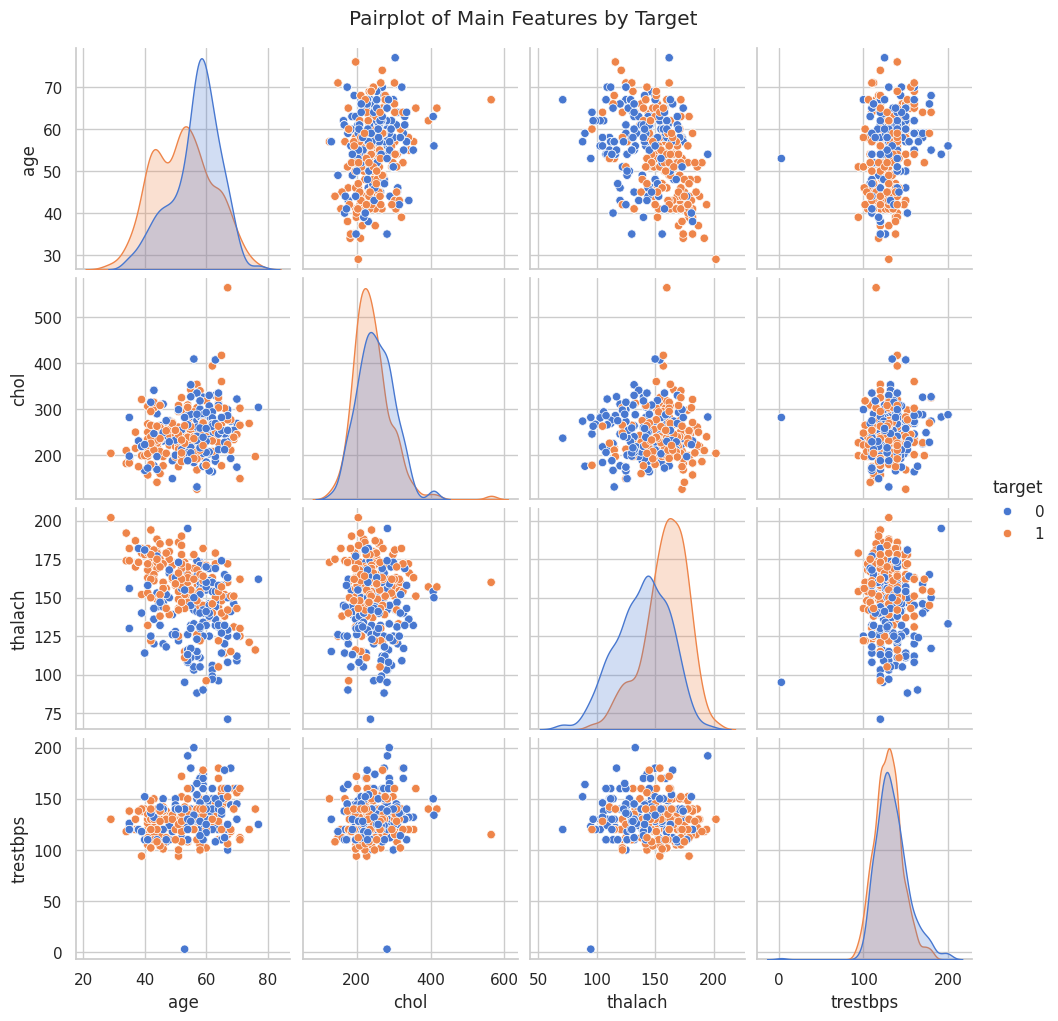

In [ ]:
# Pairplot for main features vs target
main_features = ['age', 'chol', 'thalach', 'trestbps', 'target']
sns.pairplot(df[main_features], hue='target', diag_kind='kde')
plt.suptitle("Pairplot of Main Features by Target", y=1.02)
plt.show()

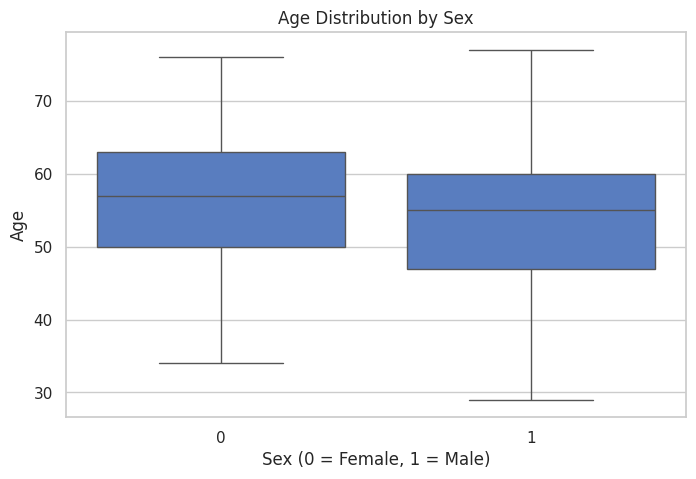

In [ ]:
# TRENDS BY AGE AND GENDER

if 'sex' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='sex', y='age', data=df)
    plt.title("Age Distribution by Sex")
    plt.xlabel("Sex (0 = Female, 1 = Male)")
    plt.ylabel("Age")
    plt.show()

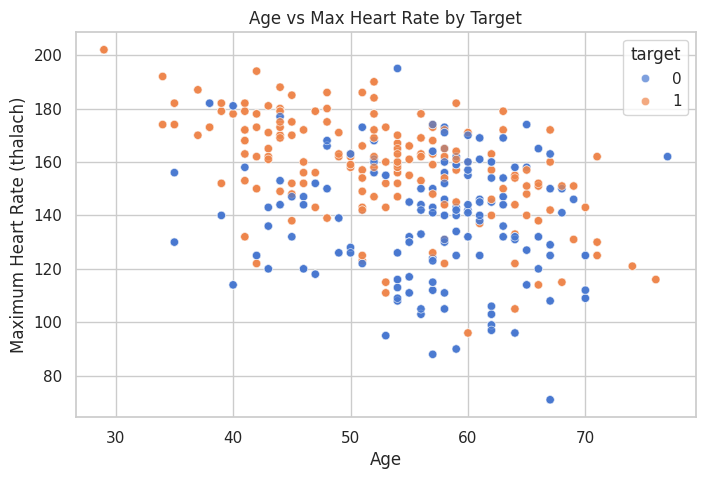

In [ ]:
# Trend: Age vs Max Heart Rate by Target
if 'thalach' in df.columns and 'target' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='age', y='thalach', hue='target', data=df, alpha=0.7)
    plt.title("Age vs Max Heart Rate by Target")
    plt.xlabel("Age")
    plt.ylabel("Maximum Heart Rate (thalach)")
    plt.show()

# **Model Training**


In [ ]:
#split train/test
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

# We split the data into 70% training and 30% testing
# random_state=42 ensures the split is reproducible(same model behavior)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


1.Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# max_iter increased to ensure convergence(stable solution as in reached optimal solution)
#1.intialize
log_model = LogisticRegression(max_iter=10000)
#2.train
log_model.fit(X_train, y_train)
# 3. Evaluate
y_pred_test = log_model.predict(X_test)
y_pred_train = log_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train) * 100
test_accuracy = accuracy_score(y_test, y_pred_test) * 100
precision = precision_score(y_test, y_pred_test, average="macro") * 100
recall = recall_score(y_test, y_pred_test, average="macro") * 100
f1 = f1_score(y_test, y_pred_test, average="macro") * 100

print("Train Accuracy:", round(train_accuracy, 2), "%")
print("Test Accuracy:", round(test_accuracy, 2), "%")
print("Precision:", round(precision, 2), "%")
print("Recall:", round(recall, 2), "%")
print("F1-Score:", round(f1, 2), "%")


Train Accuracy: 87.31 %
Test Accuracy: 80.52 %
Precision: 80.97 %
Recall: 80.71 %
F1-Score: 80.5 %


2.Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#will make descions based on the splits
#1.intialize
dt_model = DecisionTreeClassifier(random_state=42)
#2.train
dt_model.fit(X_train, y_train)
# 3. Evaluate
y_pred_test = dt_model.predict(X_test)
y_pred_train = dt_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train) * 100
test_accuracy = accuracy_score(y_test, y_pred_test) * 100
precision = precision_score(y_test, y_pred_test, average="macro") * 100
recall = recall_score(y_test, y_pred_test, average="macro") * 100
f1 = f1_score(y_test, y_pred_test, average="macro") * 100

print("Train Accuracy:", round(train_accuracy, 2), "%")
print("Test Accuracy:", round(test_accuracy, 2), "%")
print("Precision:", round(precision, 2), "%")
print("Recall:", round(recall, 2), "%")
print("F1-Score:", round(f1, 2), "%")


Train Accuracy: 100.0 %
Test Accuracy: 97.08 %
Precision: 97.32 %
Recall: 96.98 %
F1-Score: 97.07 %


3.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#multiple trees to impove accuracy and stability
#1.intialize
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
#2.train
rf_model.fit(X_train, y_train)
# 3. Evaluate
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train) * 100
test_accuracy = accuracy_score(y_test, y_pred_test) * 100
precision = precision_score(y_test, y_pred_test, average="macro") * 100
recall = recall_score(y_test, y_pred_test, average="macro") * 100
f1 = f1_score(y_test, y_pred_test, average="macro") * 100

print("Train Accuracy:", round(train_accuracy, 2), "%")
print("Test Accuracy:", round(test_accuracy, 2), "%")
print("Precision:", round(precision, 2), "%")
print("Recall:", round(recall, 2), "%")
print("F1-Score:", round(f1, 2), "%")


Train Accuracy: 100.0 %
Test Accuracy: 98.05 %
Precision: 98.18 %
Recall: 97.99 %
F1-Score: 98.05 %


4.KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#1.intialize
knn_model = KNeighborsClassifier(n_neighbors=5)
#k=5 was picked due to it being a default recommended value for KNN reulting in a stable
# preformance over balanced data
#2.train
knn_model.fit(X_train, y_train)
# 3. Evaluate
y_pred_test = knn_model.predict(X_test)
y_pred_train = knn_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train) * 100
test_accuracy = accuracy_score(y_test, y_pred_test) * 100
precision = precision_score(y_test, y_pred_test, average="macro") * 100
recall = recall_score(y_test, y_pred_test, average="macro") * 100
f1 = f1_score(y_test, y_pred_test, average="macro") * 100

print("Train Accuracy:", round(train_accuracy, 2), "%")
print("Test Accuracy:", round(test_accuracy, 2), "%")
print("Precision:", round(precision, 2), "%")
print("Recall:", round(recall, 2), "%")
print("F1-Score:", round(f1, 2), "%")

Train Accuracy: 87.73 %
Test Accuracy: 71.43 %
Precision: 71.47 %
Recall: 71.48 %
F1-Score: 71.43 %


5.Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
#1.intialize
nb_model = GaussianNB()
#2.train
nb_model.fit(X_train, y_train)
# 3. Evaluate
y_pred_test = nb_model.predict(X_test)
y_pred_train = nb_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train) * 100
test_accuracy = accuracy_score(y_test, y_pred_test) * 100
precision = precision_score(y_test, y_pred_test, average="macro") * 100
recall = recall_score(y_test, y_pred_test, average="macro") * 100
f1 = f1_score(y_test, y_pred_test, average="macro") * 100

print("Train Accuracy:", round(train_accuracy, 2), "%")
print("Test Accuracy:", round(test_accuracy, 2), "%")
print("Precision:", round(precision, 2), "%")
print("Recall:", round(recall, 2), "%")
print("F1-Score:", round(f1, 2), "%")


Train Accuracy: 84.52 %
Test Accuracy: 80.84 %
Precision: 81.46 %
Recall: 81.07 %
F1-Score: 80.81 %


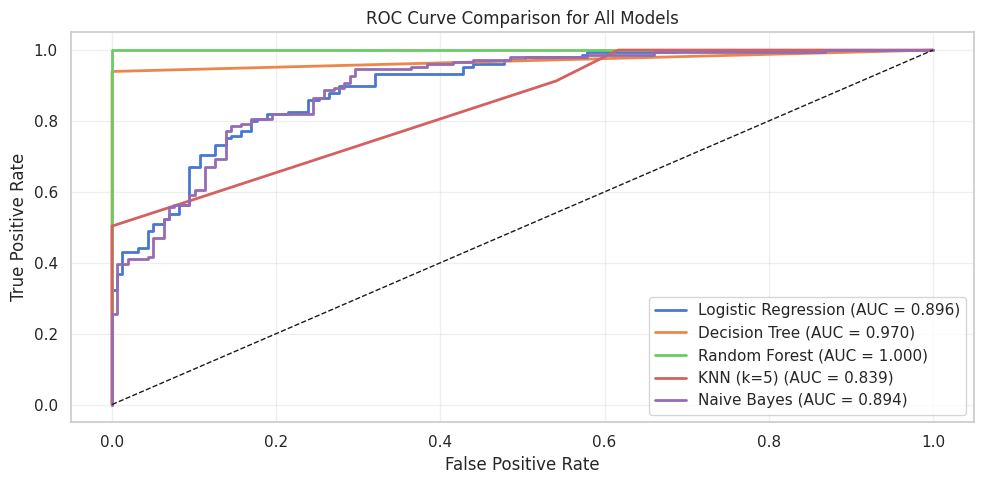

In [ ]:
from sklearn.metrics import roc_curve, auc

# Dictionary of trained models
trained_models = {
    "Logistic Regression": log_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "KNN (k=5)": knn_model,
    "Naive Bayes": nb_model
}

plt.figure(figsize=(10, 5))

for name, model in trained_models.items():

    # predict probability if available
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]

    # if no predict_proba (rare), use decision_function
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)

    else:
        continue  # skip if ROC cannot be computed

    # Compute ROC metrics
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # plot
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.title("ROC Curve Comparison for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Classification metric

In [ ]:
# Logistic Regression

# Predictions from  logistic regression
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, zero_division=0)

# Recall (Sensitivity / TPR)
recall = recall_score(y_test, y_pred, zero_division=0)

# True Positive Rate = Recall
tpr = recall

# True Negative Rate / Specificity
tnr = tn / (tn + fp)

# F1 Score
f1 = f1_score(y_test, y_pred, zero_division=0)

# ROC Curve + AUC
fpr, tpr_values, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr_values)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (TPR):", recall)
print("TNR (Specificity):", tnr)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)


Confusion Matrix:
 [[119  40]
 [ 20 129]]
Accuracy: 0.8051948051948052
Precision: 0.7633136094674556
Recall (TPR): 0.8657718120805369
TNR (Specificity): 0.7484276729559748
F1 Score: 0.8113207547169812
ROC AUC: 0.89552994808155


In [ ]:
# Decision Tree

# Predictions from  decision tree
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, zero_division=0)

# Recall (Sensitivity / TPR)
recall = recall_score(y_test, y_pred, zero_division=0)

# True Positive Rate = Recall
tpr = recall

# True Negative Rate / Specificity
tnr = tn / (tn + fp)

# F1 Score
f1 = f1_score(y_test, y_pred, zero_division=0)

# ROC Curve + AUC
fpr, tpr_values, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr_values)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (TPR):", recall)
print("TNR (Specificity):", tnr)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)


Confusion Matrix:
 [[159   0]
 [  9 140]]
Accuracy: 0.9707792207792207
Precision: 1.0
Recall (TPR): 0.9395973154362416
TNR (Specificity): 1.0
F1 Score: 0.9688581314878892
ROC AUC: 0.9697986577181208


In [ ]:
#Random Forest

# Predictions from  random forest
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, zero_division=0)

# Recall (Sensitivity / TPR)
recall = recall_score(y_test, y_pred, zero_division=0)

# True Positive Rate = Recall
tpr = recall

# True Negative Rate / Specificity
tnr = tn / (tn + fp)

# F1 Score
f1 = f1_score(y_test, y_pred, zero_division=0)

# ROC Curve + AUC
fpr, tpr_values, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr_values)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (TPR):", recall)
print("TNR (Specificity):", tnr)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)


Confusion Matrix:
 [[159   0]
 [  6 143]]
Accuracy: 0.9805194805194806
Precision: 1.0
Recall (TPR): 0.959731543624161
TNR (Specificity): 1.0
F1 Score: 0.9794520547945206
ROC AUC: 1.0


In [ ]:
#KNN

# Predictions from KNN
y_pred = knn_model.predict(X_test)
y_prob = knn_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, zero_division=0)

# Recall (Sensitivity / TPR)
recall = recall_score(y_test, y_pred, zero_division=0)

# True Positive Rate = Recall
tpr = recall

# True Negative Rate / Specificity
tnr = tn / (tn + fp)

# F1 Score
f1 = f1_score(y_test, y_pred, zero_division=0)

# ROC Curve + AUC
fpr, tpr_values, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr_values)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (TPR):", recall)
print("TNR (Specificity):", tnr)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)


Confusion Matrix:
 [[111  48]
 [ 40 109]]
Accuracy: 0.7142857142857143
Precision: 0.6942675159235668
Recall (TPR): 0.7315436241610739
TNR (Specificity): 0.6981132075471698
F1 Score: 0.7124183006535948
ROC AUC: 0.8386729137647209


In [ ]:
#Naive Bayes

# Predictions from  Naive Bayes
y_pred = nb_model.predict(X_test)
y_prob = nb_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, zero_division=0)

# Recall (Sensitivity / TPR)
recall = recall_score(y_test, y_pred, zero_division=0)

# True Positive Rate = Recall
tpr = recall

# True Negative Rate / Specificity
tnr = tn / (tn + fp)

# F1 Score
f1 = f1_score(y_test, y_pred, zero_division=0)

# ROC Curve + AUC
fpr, tpr_values, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr_values)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (TPR):", recall)
print("TNR (Specificity):", tnr)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)


Confusion Matrix:
 [[118  41]
 [ 18 131]]
Accuracy: 0.8084415584415584
Precision: 0.7616279069767442
Recall (TPR): 0.8791946308724832
TNR (Specificity): 0.7421383647798742
F1 Score: 0.8161993769470405
ROC AUC: 0.8943480646659069


# **Best Model**

In [ ]:
#Mapping model names to trained model objects
model_mapping = {
    "Logistic Regression": log_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "KNN (k=5)": knn_model,
    "Naive Bayes": nb_model
}

# Ensure results table is sorted by F1-score (descending)
results_df = results_df.sort_values("F1-score (%)", ascending=False)

# Select the best model based on F1-score
best_row = results_df.iloc[0]
best_name = best_row["Model"]
best_model = model_mapping[best_name]

print("===== BEST MODEL =====")
print(f"Best Model Based on F1-score: {best_name}\n")
print(best_row)


===== BEST MODEL =====
Best Model Based on F1-score: Random Forest

Model            Random Forest
Accuracy (%)         98.051948
Precision (%)        98.181818
Recall (%)           97.986577
F1-score (%)         98.046677
Name: 2, dtype: object


In [ ]:
#Predictions and Confusion Matrix

# Predictions from the best model
y_pred = best_model.predict(X_test)

# Probability predictions for ROC Curve
y_prob = best_model.predict_proba(X_test)[:, 1]

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[159   0]
 [  6 143]]


In [ ]:
#Evaluation Metrics (Accuracy, Precision, Recall, F1)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall    = recall_score(y_test, y_pred, zero_division=0)
f1        = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


Accuracy : 0.9805
Precision: 1.0000
Recall   : 0.9597
F1 Score : 0.9795


In [ ]:
#Classification Report

from sklearn.metrics import classification_report

print("=== Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



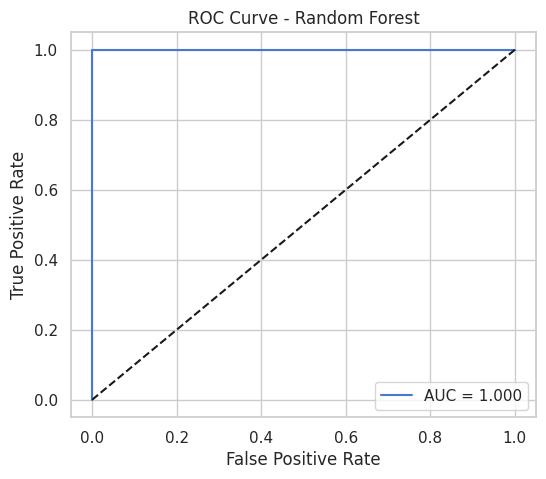

In [ ]:
# === ROC Curve & AUC ===

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {best_name}")
plt.legend(loc="lower right")
plt.show()


,Model,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.981,1.000,0.960,0.979
1,Decision Tree,0.971,1.000,0.940,0.969
2,Naive Bayes,0.808,0.762,0.879,0.816
3,Logistic Regression,0.805,0.763,0.866,0.811
4,KNN (k=5),0.714,0.694,0.732,0.712


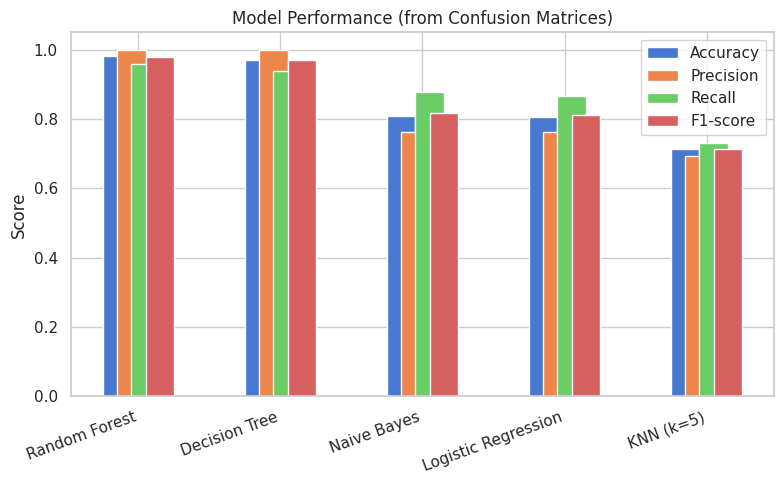

In [ ]:

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

models = [
    ("Logistic Regression", log_model),
    ("Decision Tree",       dt_model),
    ("Random Forest",       rf_model),
    ("KNN (k=5)",           knn_model),
    ("Naive Bayes",         nb_model),
]

cms = {}
for name, model in models:
    y_pred = model.predict(X_test)
    cms[name] = confusion_matrix(y_test, y_pred, labels=[0,1])

def metrics_from_cm_binary(cm):
    tn, fp, fn, tp = cm.ravel()
    acc = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) else 0.0
    prec = tp / (tp + fp) if (tp + fp) else 0.0
    rec  = tp / (tp + fn) if (tp + fn) else 0.0
    f1   = (2*prec*rec/(prec+rec)) if (prec+rec) else 0.0
    return acc, prec, rec, f1

rows = []
for name, cm in cms.items():
    acc, prec, rec, f1 = metrics_from_cm_binary(cm)
    rows.append([name, acc, prec, rec, f1])

results_df = pd.DataFrame(rows, columns=["Model","Accuracy","Precision","Recall","F1-score"])\
               .sort_values("F1-score", ascending=False)\
               .reset_index(drop=True)

display(results_df.round(3))
results_df.to_csv("models_comparison_from_CM.csv", index=False)

plt.figure(figsize=(8,5))
x = np.arange(len(results_df)); w = 0.2
plt.bar(x-1.5*w/2, results_df["Accuracy"],  width=w, label="Accuracy")
plt.bar(x-0.5*w/2, results_df["Precision"], width=w, label="Precision")
plt.bar(x+0.5*w/2, results_df["Recall"],    width=w, label="Recall")
plt.bar(x+1.5*w/2, results_df["F1-score"],  width=w, label="F1-score")
plt.xticks(x, results_df["Model"], rotation=20, ha="right")
plt.ylabel("Score"); plt.title("Model Performance (from Confusion Matrices)")
plt.legend(); plt.tight_layout()
plt.savefig("models_comparison_from_CM.png"); plt.show()